In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/최종.xlsx')
data.head()

,Unnamed: 0,Income,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,0.083844,0.0,0.425318,0.442211,0.316522,0.664093,0.335878,0.357143,0.307692,0.538462
1,1,0.066088,0.5,0.007368,0.005025,0.003478,0.007722,0.003817,0.035714,0.153846,0.384615
2,2,0.104131,0.0,0.285332,0.246231,0.073623,0.428571,0.080153,0.071429,0.769231,0.307692
3,3,0.036432,0.5,0.007368,0.020101,0.011594,0.038610,0.011450,0.000000,0.307692,0.461538
4,4,0.084078,0.5,0.115874,0.216080,0.068406,0.177606,0.103053,0.107143,0.461538,0.384615


In [3]:
import numpy as np

train = data[['Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].to_numpy()
# print(train)

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(train)

# print(train.shape)
train_pca = pca.transform(train)

train_df = pd.DataFrame(train_pca,columns = ['Column_A','Column_B','Column_C','Column_D','Column_E'])
train_df

,Column_A,Column_B,Column_C,Column_D,Column_E
0,0.515724,0.321336,-0.168393,0.428253,-0.214536
1,-0.478677,0.092853,-0.057706,0.013236,0.131870
2,0.424961,-0.005392,0.003273,-0.156249,-0.091547
3,-0.415801,0.085639,0.038599,-0.069753,0.038101
4,-0.120316,0.238052,0.114050,-0.076812,0.031909
...,...,...,...,...,...
2203,0.267983,-0.031958,-0.108036,0.273996,-0.036721
2204,-0.539313,0.267175,0.543003,0.061828,0.157297
2205,0.519162,-0.295101,0.373572,-0.090910,-0.133108
2206,0.412499,-0.081892,0.007675,-0.165216,0.052396


In [4]:
print(sum(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_)

0.8888177641862326
[0.54738522 0.12334928 0.10307418 0.06105208 0.05395701]


In [5]:
train_df = train_df[['Column_A', 'Column_B', 'Column_C']]

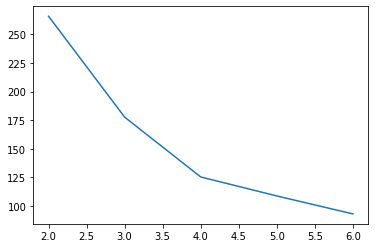

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k,random_state=42)
  km.fit(train_df)
  inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.show()

In [7]:
km = KMeans(n_clusters=4, random_state= 42)
km.fit(train_df)

KMeans(n_clusters=4, random_state=42)

In [8]:
train_df['cluster'] = km.labels_
train_df.head() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Column_A,Column_B,Column_C,cluster
0,0.515724,0.321336,-0.168393,2
1,-0.478677,0.092853,-0.057706,1
2,0.424961,-0.005392,0.003273,0
3,-0.415801,0.085639,0.038599,1
4,-0.120316,0.238052,0.114050,1


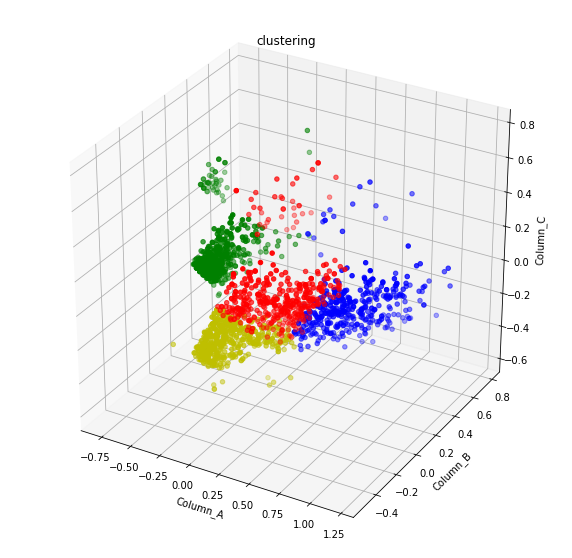

In [45]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Column_A', fontsize= 10, rotation= 150)
ax.set_ylabel('Column_B', fontsize= 10, rotation= 150)
ax.set_zlabel('Column_C', fontsize= 10, rotation= 10)

x0 = train_df[train_df['cluster']==0]['Column_A']
y0 = train_df[train_df['cluster']==0]['Column_B']
z0 = train_df[train_df['cluster']==0]['Column_C']
ax.scatter(x0, y0, z0, color='r',label='cluster_0')

x1 = train_df[train_df['cluster']==1]['Column_A']
y1 = train_df[train_df['cluster']==1]['Column_B']
z1 = train_df[train_df['cluster']==1]['Column_C']
ax.scatter(x1, y1, z1, color='g',label='cluster_1')

x2 = train_df[train_df['cluster']==2]['Column_A']
y2 = train_df[train_df['cluster']==2]['Column_B']
z2 = train_df[train_df['cluster']==2]['Column_C']
ax.scatter(x2, y2, z2, color='b',label='cluster_2')

x3 = train_df[train_df['cluster']==3]['Column_A']
y3 = train_df[train_df['cluster']==3]['Column_B']
z3 = train_df[train_df['cluster']==3]['Column_C']
ax.scatter(x3, y3, z3, color='y',label='cluster_3')

ax.set_title("clustering")
plt.show()

In [32]:
data_ = pd.read_excel('/content/drive/MyDrive/최종.xlsx')
data_ = data_[['Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Income']]
data_['cluster'] = km.labels_
data_.head()

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,cluster
0,0.0,0.425318,0.442211,0.316522,0.664093,0.335878,0.357143,0.307692,0.538462,0.083844,2
1,0.5,0.007368,0.005025,0.003478,0.007722,0.003817,0.035714,0.153846,0.384615,0.066088,1
2,0.0,0.285332,0.246231,0.073623,0.428571,0.080153,0.071429,0.769231,0.307692,0.104131,0
3,0.5,0.007368,0.020101,0.011594,0.038610,0.011450,0.000000,0.307692,0.461538,0.036432,1
4,0.5,0.115874,0.216080,0.068406,0.177606,0.103053,0.107143,0.461538,0.384615,0.084078,1


In [33]:
index = data_[data_['Income'] > 0.2].index
data_ = data_.drop(index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


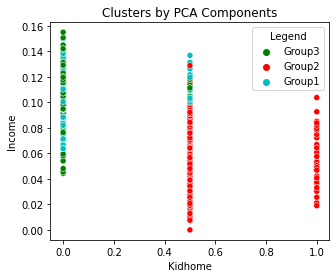

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


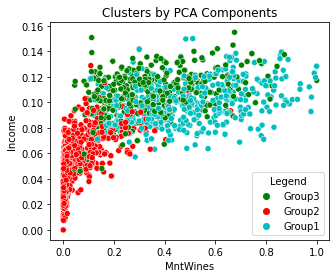

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


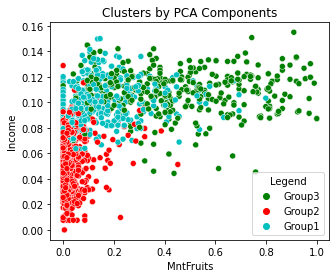

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


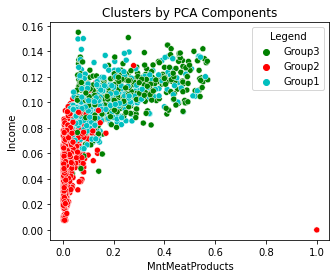

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


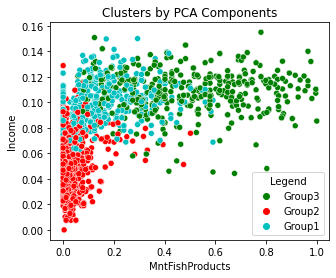

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


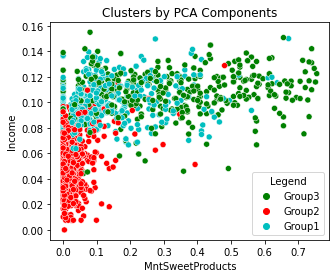

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


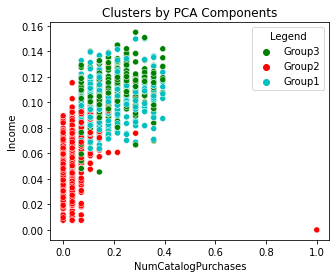

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


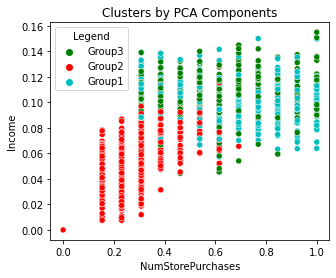

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


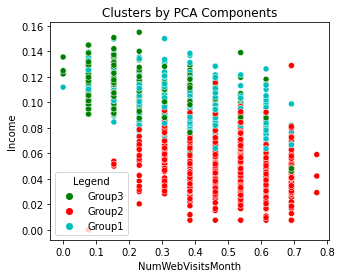

In [36]:
feature_list = ['Kidhome','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

for i in feature_list:
  data_['Legend'] = data_['cluster'].map({0:'Group1', 1:'Group2',2:'Group3'})
  x_axis = data_[i]
  y_axis = data_['Income']
  plt.figure(figsize = (5, 4))
  sns.scatterplot(x_axis, y_axis, hue = data_['Legend'], palette = ['g', 'r', 'c'])
  plt.title('Clusters by PCA Components')
  plt.show()